# WINE QUALITY PREDICTION

This project aims to predict wine quality using classification algorithms. The dataset used can be found on Kaggle [here](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/discussion/308022). It contains information about the red variants of the Portuguese "Vinho Verde" wine. Each wine has a rating between 1-10 based on the mix of chemicals it contains. According to this [website](https://www.lifesavvy.com/70685/how-much-wine-do-americans-drink-in-a-year/), the average American drinks 3.2 gallon of wine every year and is an important part of most meals. Given the chemicals contained in the wine, can we predict its?

In [1]:
#load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"  

In [2]:
#load dataset

wine_df = pd.read_csv('https://raw.githubusercontent.com/SandyCOG/Predicting-Wine-Quality/main/WineQT.csv') #preloaded to my personal github page
wine_df.head() #prints the first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
#checking dataset info

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
#checking the shape of the dataset

wine_df.shape

(1143, 13)

The dataset has 1143 rows and 13 columns

In [5]:
#checking the statistical summary of the dataset

wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


From the statistical summary we can observe
*   Outliers in residual sugar, free sulfur dioxide & total sulfur dioxide columns.
*   The standard deviations for these columns also shows that the data is widely spread when compared to the mean.


In [6]:
#checking for null values

wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
#checking for duplicates

wine_df.duplicated().sum()

0

There are no duplicates and no missing values in the dataset

In [8]:
#checking datatypes of columns in dataset

wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [9]:
#dropping the id column as it is not needed and does not contribute to wine quality

wine_df = wine_df.drop(columns='Id')

In [10]:
#Unique values for wine quality

wine_df.quality.unique()  #checking to see the unique classes for wine quality

array([5, 6, 7, 4, 8, 3])

There are six classes for wine rating

5, 6, 7, 4, 8, 3

In [11]:
wine_df['quality'].value_counts(normalize = True).round(3)

5    0.423
6    0.404
7    0.125
4    0.029
8    0.014
3    0.005
Name: quality, dtype: float64

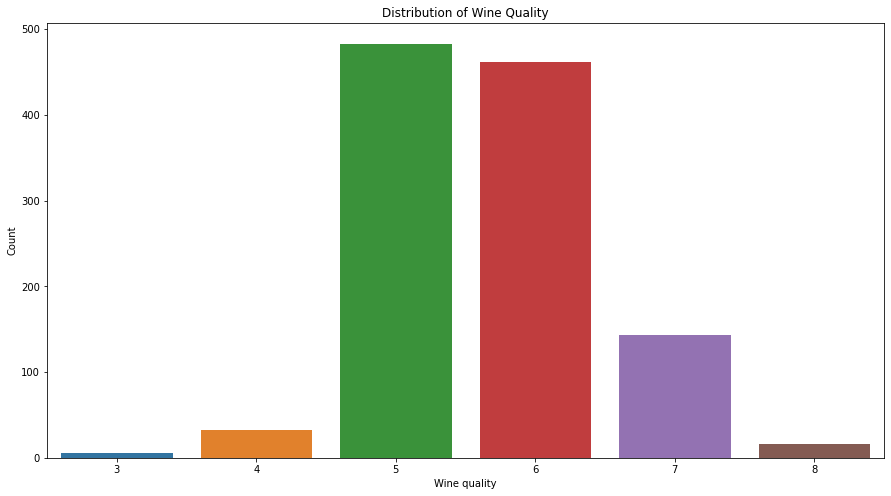

In [12]:
# visualize the target column - quality 

plt.figure(figsize = (15, 8))
sns.countplot(wine_df['quality'])
plt.xlabel('Wine quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

The classes of wines are not balanced as wines rated as 5 or 6 have more values than other classes of wine.

In [13]:
#checking for correlation

C = wine_df.corr()

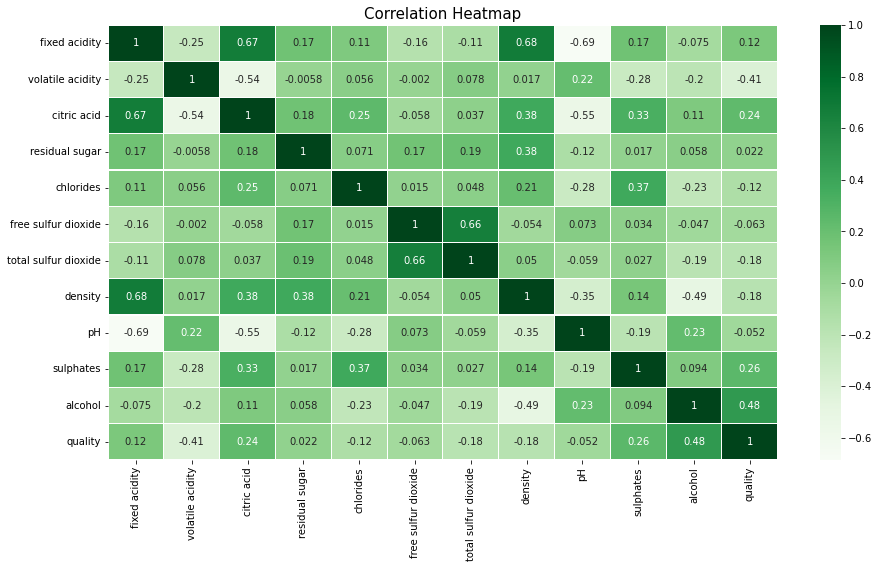

In [14]:
# correlation heatmap

plt.figure(figsize = (15, 8))
g = sns.heatmap(C, annot = True, cmap = 'Greens', linewidths = 0.1)
plt.title('Correlation Heatmap', size = 15)
plt.show()

From the correlation map above:

The highest positive correlation of 0.68 can be observed between density and fixed acidity
The lowest negative correlation of -0.69 can be observed between pH and fixed acidity

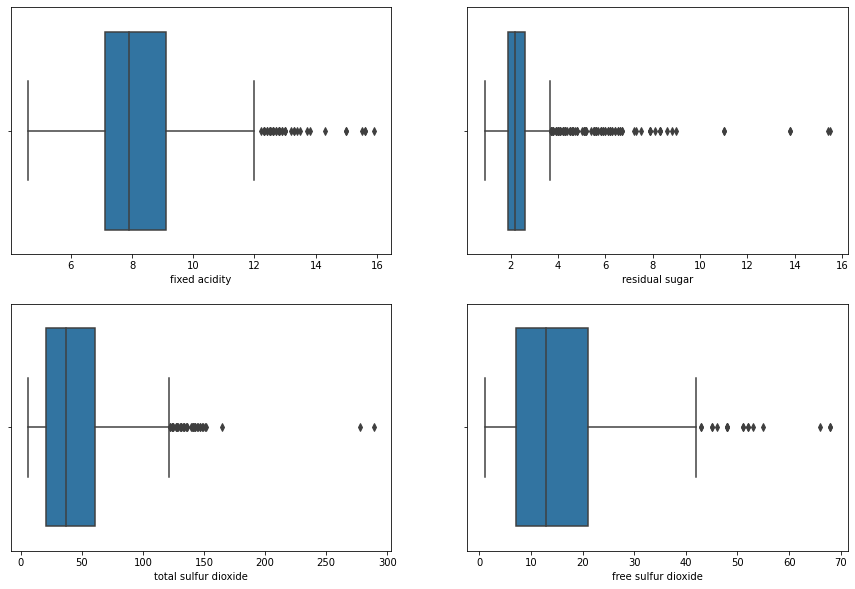

In [15]:
# checking for outliers using boxplots
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(x = 'fixed acidity', data=wine_df, ax = ax[0, 0])
sns.boxplot(x = 'residual sugar', data=wine_df, ax = ax[0, 1])
sns.boxplot(x = 'total sulfur dioxide', data=wine_df, ax = ax[1, 0])
sns.boxplot(x = 'free sulfur dioxide', data=wine_df, ax = ax[1, 1])
plt.show()

# LOG NORMALIZATION

In [16]:
wine_df.var().round(3)

fixed acidity              3.054
volatile acidity           0.032
citric acid                0.039
residual sugar             1.839
chlorides                  0.002
free sulfur dioxide      105.072
total sulfur dioxide    1074.668
density                    0.000
pH                         0.025
sulphates                  0.029
alcohol                    1.171
quality                    0.649
dtype: float64

From the code cell above, the variance of columns free sulphur dioxide and total sulphur dioxide is relatively high. In the cell below, I use log normalization to reduce the variance.

In [17]:
# Replace the values with log-transformed values
wine_df[['free sulfur dioxide']] = wine_df[['free sulfur dioxide']].apply(np.log)
wine_df[['total sulfur dioxide']] = wine_df[['total sulfur dioxide']].apply(np.log)

In [18]:
wine_df.var().round(3)

fixed acidity           3.054
volatile acidity        0.032
citric acid             0.039
residual sugar          1.839
chlorides               0.002
free sulfur dioxide     0.466
total sulfur dioxide    0.490
density                 0.000
pH                      0.025
sulphates               0.029
alcohol                 1.171
quality                 0.649
dtype: float64

In [19]:
# Import train_test_split method 

from sklearn.model_selection import train_test_split 

# Split transfusion DataFrame into 
# X_train, X_test, y_train and y_test datasets, 
# stratifying on the `target` column 

X_train, X_test, y_train, y_test = train_test_split( wine_df.drop(columns='quality'), wine_df.quality, test_size=0.25, random_state=42, stratify=wine_df.quality)

In [20]:
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 857 rows
Test Set: 286 rows


# LOGISTIC REGRESSION MODEL

In [21]:
#importing logistic regression model
from sklearn.linear_model import LogisticRegression

# Fitting the model on the training set
Log_model = LogisticRegression().fit(X_train, y_train)
print(Log_model)

LogisticRegression()


In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Log_y_pred = Log_model.predict(X_test)
print("Overall Accuracy:", accuracy_score(y_test, Log_y_pred))

print(classification_report(y_test, Log_y_pred))

Overall Accuracy: 0.6643356643356644
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.71      0.80      0.75       121
           6       0.62      0.69      0.66       116
           7       0.62      0.36      0.46        36
           8       0.00      0.00      0.00         4

    accuracy                           0.66       286
   macro avg       0.33      0.31      0.31       286
weighted avg       0.63      0.66      0.64       286



# KNN MODEL


In [25]:
# Train the KNN model
from sklearn.neighbors import KNeighborsClassifier

# Fitting the model on the training set
KNNmodel = KNeighborsClassifier().fit(X_train, y_train)
print(KNNmodel)

KNeighborsClassifier()


In [26]:
#predicting the test results 
k_y_pred = KNNmodel.predict(X_test) 
k_y_pred[:10]


array([6, 6, 5, 5, 6, 6, 5, 5, 6, 6])

In [27]:

print("Overall Accuracy:", accuracy_score(y_test, k_y_pred))

print(classification_report(y_test, k_y_pred))

Overall Accuracy: 0.5769230769230769
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.66      0.72      0.69       121
           6       0.54      0.60      0.57       116
           7       0.33      0.22      0.27        36
           8       0.00      0.00      0.00         4

    accuracy                           0.58       286
   macro avg       0.26      0.26      0.25       286
weighted avg       0.54      0.58      0.56       286



# DECISION TREE CLASSIFIER


In [28]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
DTmodel = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

DT_y_pred = DTmodel.predict(X_test) 

In [29]:
#calculating accuracy score
print("Overall Accuracy:", accuracy_score(y_test, DT_y_pred))



Overall Accuracy: 0.6153846153846154


# RANDOM FOREST CLASSIFIER

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
RMmodel = RandomForestClassifier(random_state=0).fit(X_train, y_train)

RF_y_pred = RMmodel.predict(X_test) 

#calculating accuracy score
print("Overall Accuracy:", accuracy_score(y_test, RF_y_pred))

print(classification_report(y_test, RF_y_pred))

Overall Accuracy: 0.7132867132867133
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.72      0.84      0.78       121
           6       0.71      0.70      0.70       116
           7       0.67      0.56      0.61        36
           8       1.00      0.25      0.40         4

    accuracy                           0.71       286
   macro avg       0.52      0.39      0.41       286
weighted avg       0.69      0.71      0.70       286



# LIGHT GRADIENT BOOSTING CLASSIFIER

In [31]:
# import linrary
from lightgbm import LGBMClassifier

LGBMmodel = LGBMClassifier(random_state=0).fit(X_train, y_train)

# predict
LGy_predict = LGBMmodel.predict(X_test)

# accuracy score
score = accuracy_score(y_test, LGy_predict)

print('Accuracy score is:', score)

print(classification_report(y_test, LGy_predict))

Accuracy score is: 0.6853146853146853
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.70      0.83      0.76       121
           6       0.70      0.65      0.67       116
           7       0.61      0.53      0.57        36
           8       0.50      0.50      0.50         4

    accuracy                           0.69       286
   macro avg       0.42      0.42      0.42       286
weighted avg       0.66      0.69      0.67       286



# SUPPORT VECTOR MACHINE

In [32]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train, y_train)
# predicting 
y_pred_svc = model_svc.predict(X_test)

# calculating the training and testing accuracies

print("svm Testing accuracy :", accuracy_score(y_test, y_pred_svc))

print(classification_report(y_test, y_pred_svc))

svm Testing accuracy : 0.6153846153846154
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.66      0.85      0.74       121
           6       0.56      0.63      0.59       116
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00         4

    accuracy                           0.62       286
   macro avg       0.20      0.25      0.22       286
weighted avg       0.51      0.62      0.56       286



# FINE TUNING RANDOM FOREST MODEL

Random forest had the highest accuracy among all the models used. Therefore, to increase the accuracy of the model I will perform hyperparameters tuning.

In [33]:
RMmodel
parameters = {"n_estimators":[10, 20, 40, 100, 200], "max_depth":[None, 18, 40, 60, 100]}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(RMmodel,parameters, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 18, 40, 60, 100],
                         'n_estimators': [10, 20, 40, 100, 200]})

In [34]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

Best parameters are: {'max_depth': 18, 'n_estimators': 200}


0.59 + or -0.029 for the {'max_depth': None, 'n_estimators': 10}
0.604 + or -0.02 for the {'max_depth': None, 'n_estimators': 20}
0.627 + or -0.025 for the {'max_depth': None, 'n_estimators': 40}
0.638 + or -0.018 for the {'max_depth': None, 'n_estimators': 100}
0.644 + or -0.029 for the {'max_depth': None, 'n_estimators': 200}
0.583 + or -0.03 for the {'max_depth': 18, 'n_estimators': 10}
0.596 + or -0.023 for the {'max_depth': 18, 'n_estimators': 20}
0.615 + or -0.028 for the {'max_depth': 18, 'n_estimators': 40}
0.637 + or -0.018 for the {'max_depth': 18, 'n_estimators': 100}
0.644 + or -0.025 for the {'max_depth': 18, 'n_estimators': 200}
0.59 + or -0.029 for the {'max_depth': 40, 'n_estimators': 10}
0.604 + or -0.02 for the {'max_depth': 40, 'n_estimators': 20}
0.627 + or -0.025 for the {'max_depth': 40, 'n_estimators': 40}
0.638 + or -0.018 for the {'max_depth': 40, 'n_estimators': 100}
0.644 + or -0.029 for the {'max_

[[  0   0   1   0   0   0]
 [  0   0   5   3   0   0]
 [  0   0 102  16   3   0]
 [  0   0  29  81   6   0]
 [  0   0   4  12  20   0]
 [  0   0   0   2   1   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.72      0.84      0.78       121
           6       0.71      0.70      0.70       116
           7       0.67      0.56      0.61        36
           8       1.00      0.25      0.40         4

    accuracy                           0.71       286
   macro avg       0.52      0.39      0.41       286
weighted avg       0.69      0.71      0.70       286



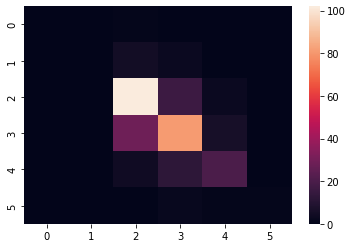

In [35]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, RF_y_pred)
print(CM)
print(classification_report(y_test, RF_y_pred))
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

# **CONCLUSION**
The Random forest model had the highest accuracy score of 0.713. With Hyperparameter tuning the best values for parameters max_depth and n_estimators were 18 and 200 respectively. However, the accuracy score with these values was lower than the accuracy score using default values for random forest hyperparameters. It can also be observed that for quality class 3 & 4, precision and recall are 0.0, this can be attributed to the imbalance in the dataset. 